In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
master_frame = pd.read_csv("master_df_FundingTypeAnalysis.csv", encoding='ISO-8859-1')

In [3]:
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0


In [4]:
# Filter the master_frame for 'venture' type investments
master_frame_venture = master_frame.loc[master_frame['funding_round_type'] == 'venture']

In [5]:
master_frame_venture.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
6,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


In [6]:
master_frame_venture.sort_values(by='raised_amount_usd', ascending=False)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
24745,/organization/freescale,Freescale Semiconductor,Semiconductors,ipo,USA,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,21-10-2006,1.760000e+10
39458,/organization/mediavast,MediaVast,Advertising|Broadcasting|Content,acquired,USA,/funding-round/07e345b61646adffc65946de6a1c88d9,venture,30-06-2003,4.700000e+09
68055,/organization/uber,Uber,Automotive|Design|Limousines|Public Transporta...,operating,USA,/funding-round/7a617d3521e9a71816c8d5cbcd4c49b0,venture,06-06-2014,1.200000e+09
68048,/organization/uber,Uber,Automotive|Design|Limousines|Public Transporta...,operating,USA,/funding-round/1fa1e079dd45f9d615ce1469ed9090fb,venture,04-12-2014,1.200000e+09
73239,/organization/xiaomi,Xiaomi,Consumer Electronics|Mobile,operating,CHN,/funding-round/0022fc712b8a48fc6b7341c6aa3b42a5,venture,22-12-2014,1.100000e+09
...,...,...,...,...,...,...,...,...,...
52117,/organization/purelifi,PureLiFi,Internet of Things|IT and Cybersecurity|Lighti...,operating,GBR,/funding-round/8d01216663b76233d9d851327aee6af7,venture,15-10-2014,0.000000e+00
73816,/organization/yondr-2,YONDR,Media,operating,BEL,/funding-round/7a03d6844ffed1f22926bc43dc0e1ebe,venture,01-11-2015,0.000000e+00
15371,/organization/cool-planet-energy-systems,Cool Planet Energy Systems,Clean Technology,operating,MEX,/funding-round/484f367472318b77d433a202f6452785,venture,17-09-2013,0.000000e+00
33983,/organization/k-12-techno-services,K-12 Techno Services,EdTech|Education,operating,IND,/funding-round/5596e3df2f3c9f795c021c8170a81805,venture,01-11-2012,0.000000e+00


In [7]:
# Group by country codes and compare the total funding amounts
country_wise_total = master_frame_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

print(country_wise_total)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
           ...     
MCO    6.570000e+05
SAU    5.000000e+05
CMR    3.595610e+05
GTM    3.000000e+05
MMR    2.000000e+05
Name: raised_amount_usd, Length: 97, dtype: float64


In [8]:
# Fetching top 9 countries
top9 = country_wise_total[:9]

top9

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

Among the top 9 countries - USA, GBR and IND are the top three English speaking countries.

In [9]:
# Filtering the top 3 english speaking countries
top3_english_speaking_countries = master_frame_venture.loc[(master_frame_venture['country_code'] == 'USA') | 
                                                          (master_frame_venture['country_code'] == 'GBR') | 
                                                            (master_frame_venture['country_code'] == 'IND')]

top3_english_speaking_countries.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
6,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
13,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


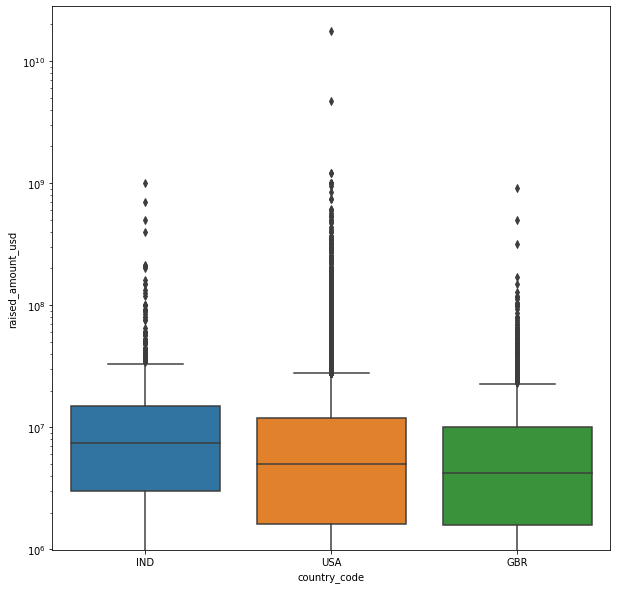

In [10]:

plt.figure(figsize=(10,10))
sns.boxplot(x=top3_english_speaking_countries['country_code'], 
            y=top3_english_speaking_countries['raised_amount_usd'],
            data = top3_english_speaking_countries)

plt.yscale('log')
plt.show()

In [11]:
top3_english_speaking_countries.groupby('country_code')['raised_amount_usd'].median().sort_values(ascending=False)

country_code
IND    7500000.0
USA    5000000.0
GBR    4260000.0
Name: raised_amount_usd, dtype: float64

### IND, USA and GBR are the top 3 countries which has recieved the highest total funding.

In [14]:
# Saving the merged master frame for further analysis
top3_english_speaking_countries.to_csv("master_df_CountryAnalysis.csv", sep=',', index=False)